<a href="https://colab.research.google.com/github/Robert-Roche/Porject/blob/main/Big_Data_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
import pylab
%matplotlib inline
from numpy import mean
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

### Read in Data

In [220]:
team_data = pd.read_csv('/content/team_info.csv')
team_stats_data = pd.read_csv('/content/game_teams_stats.csv')
game_data = pd.read_csv('/content/game.csv')

In [221]:
game_data.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,home win REG,right,United Center,/api/v1/venues/null,America/Chicago,-5,CDT
1,2017020812,20172018,R,2018-02-07T00:00:00Z,24,7,4,3,away win OT,left,KeyBank Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2015020314,20152016,R,2015-11-24T01:00:00Z,21,52,4,1,away win REG,right,MTS Centre,/api/v1/venues/null,America/Winnipeg,-5,CDT
3,2015020849,20152016,R,2016-02-17T00:00:00Z,52,12,1,2,home win REG,right,PNC Arena,/api/v1/venues/null,America/New_York,-4,EDT
4,2017020586,20172018,R,2017-12-30T03:00:00Z,20,24,1,2,home win REG,left,Honda Center,/api/v1/venues/null,America/Los_Angeles,-7,PDT


In [222]:
team_stats_data.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [223]:
team_data.head()

,team_id,franchiseId,shortName,teamName,abbreviation,link
0,1,23,New Jersey,Devils,NJD,/api/v1/teams/1
1,4,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
2,26,14,Los Angeles,Kings,LAK,/api/v1/teams/26
3,14,31,Tampa Bay,Lightning,TBL,/api/v1/teams/14
4,6,6,Boston,Bruins,BOS,/api/v1/teams/6


### Clean Data and Graphs

In [224]:
game_data=game_data.sort_values(by=['date_time_GMT'],ascending=True)
game_data['season'] = game_data['season'].astype(str).str[:4]
game_data['date_time_GMT'] = game_data['date_time_GMT'].astype(str).str[:10]

plotting = team_stats_data.merge(team_data[['team_id', 'teamName']],
              left_on='team_id', right_on='team_id') 
plotting = plotting.merge(game_data[['game_id', 'season']])

In [225]:
plotting.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,teamName,season
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left,Flyers,2016
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left,Blackhawks,2016
2,2016020246,4,home,True,REG,Dave Hakstol,5.0,22.0,32.0,2.0,1.0,0.0,55.6,11.0,10.0,20.0,left,Flyers,2016
3,2016020246,52,away,False,REG,Paul Maurice,2.0,32.0,32.0,2.0,1.0,0.0,44.4,6.0,11.0,21.0,left,Jets,2016
4,2016020986,4,away,False,REG,Dave Hakstol,2.0,38.0,17.0,4.0,3.0,1.0,57.6,12.0,5.0,14.0,left,Flyers,2016


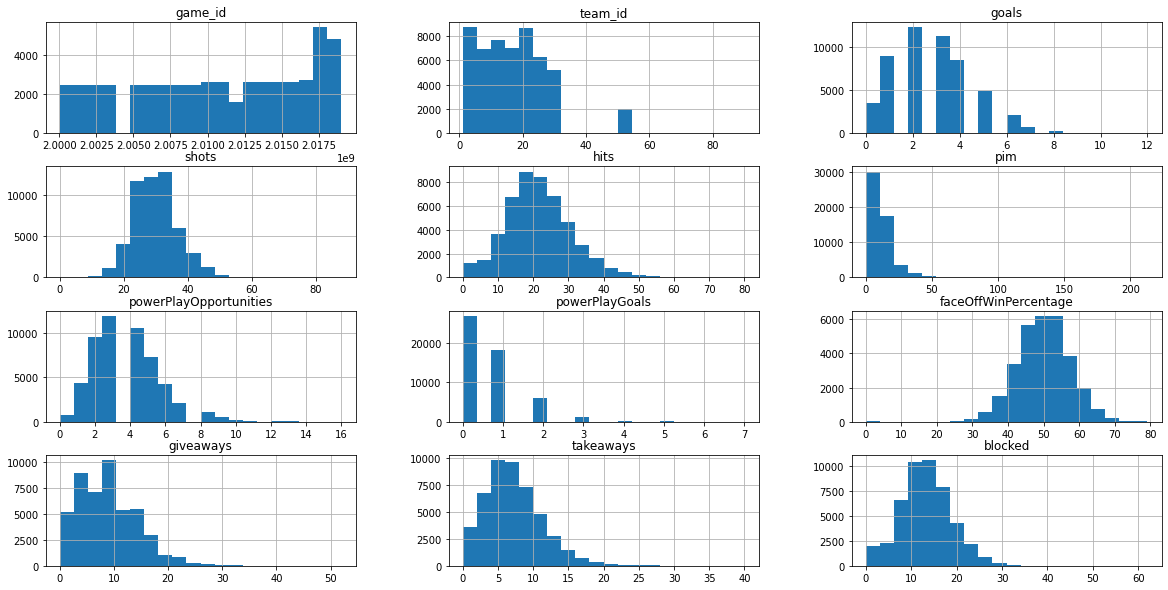

In [226]:
histograms = team_stats_data.hist(bins=20,figsize=(20,10))

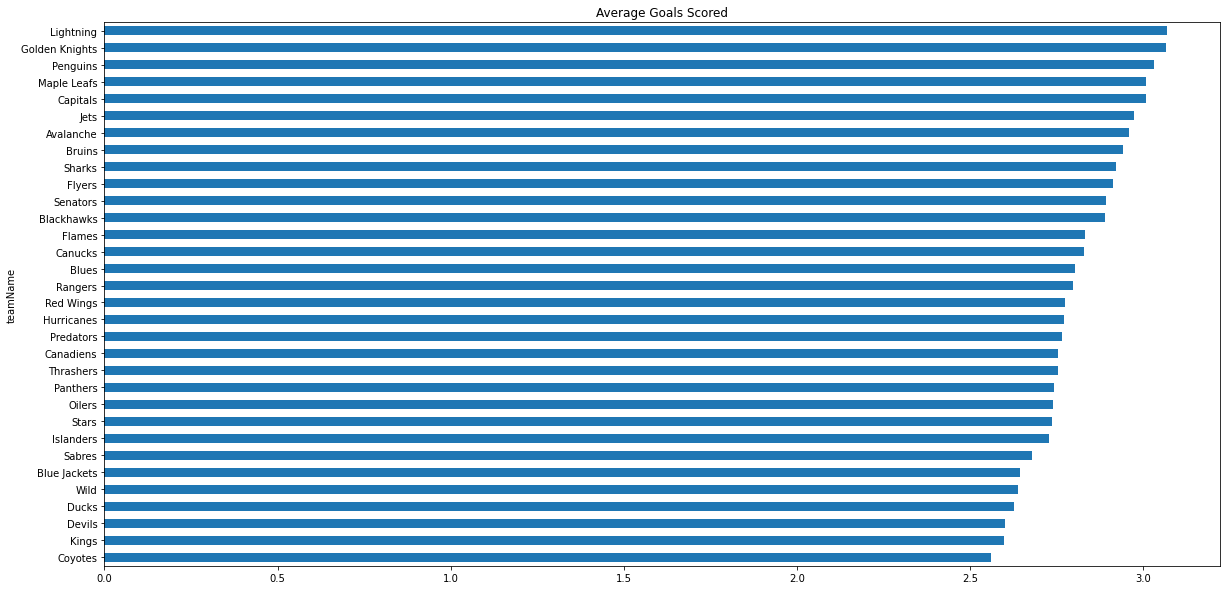

In [227]:
plotting.groupby('teamName').mean()['goals'] \
    .sort_values() \
    .plot(kind='barh', figsize=(20, 10), title='Average Goals Scored')
plt.show()

In [228]:
plotting = plotting.groupby('teamName').sum()


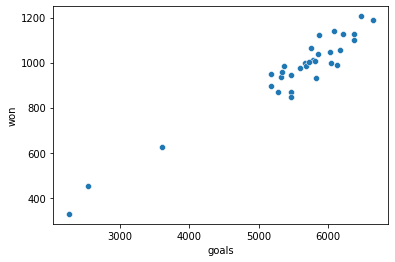

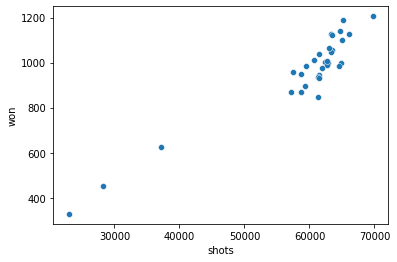

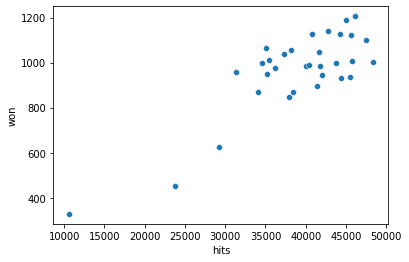

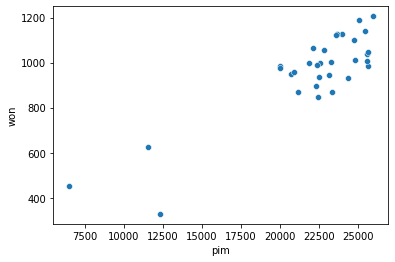

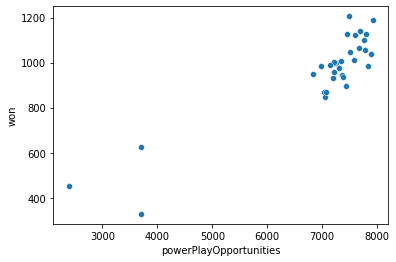

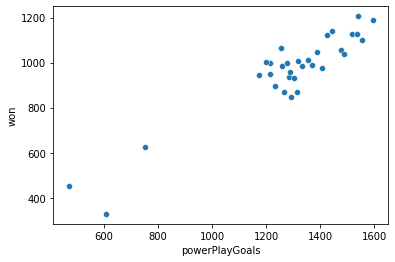

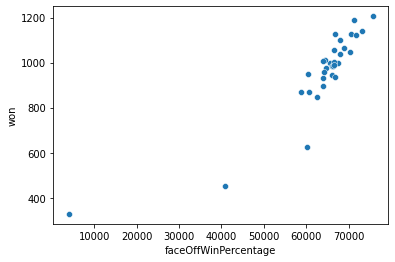

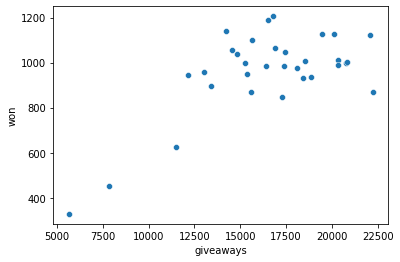

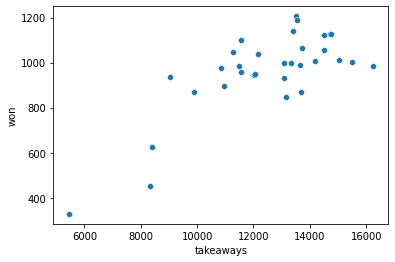

In [229]:
X = plotting.iloc[:, 3:12]
X_cols = X.columns
y_rows = plotting['won']

for feature in X_cols:
   sns.scatterplot(data = plotting, x=feature , y='won', palette='RdBu')
   plt.show()

### Table Joining

In [230]:
tsd=team_stats_data
team_stats_data['season']=team_stats_data['game_id'].astype(str).str[:4]
team_stats_data['won']= team_stats_data['won'].astype(int, errors = 'ignore')
team_stats_data=team_stats_data.replace(to_replace="home",value=0)
team_stats_data=team_stats_data.replace(to_replace="away",value=1)
team_stats_data=team_stats_data[['game_id', 'season','team_id' ,'won', 'HoA','shots','hits','pim','powerPlayOpportunities','giveaways','takeaways','blocked']].dropna()


game_data2 = game_data.merge(team_data[['team_id', 'teamName']],
              left_on='home_team_id', right_on='team_id') \
    .merge(team_data[['team_id', 'teamName']], left_on='away_team_id',
           right_on='team_id', suffixes=('home','away'))\
    .drop(['home_rink_side_start','venue_link','venue_time_zone_id','venue_time_zone_offset', 'venue_time_zone_tz'], axis=1)

teams = team_data.merge(team_stats_data, on='team_id')
game_data2.loc[game_data2['outcome'].eq('home win REG') | game_data2['outcome'].eq('home win OT'), 'Win'] = 'H'
game_data2.loc[game_data2['outcome'].eq('away win REG') | game_data2['outcome'].eq('away win OT'), 'Win'] = 'A'
games = game_data2.filter(['game_id','season','date_time_GMT','teamNamehome','home_team_id','home_goals','teamNameaway','away_team_id','away_goals','Win'],axis=1)
games.rename(columns={'date_time_GMT':'Date','teamNamehome':'H', 'home_goals':'H_Goals','teamNameaway':'A','away_goals':'A_Goals','home_team_id':'team_id','away_team_id':'A_ID'}, inplace= True)
    

team_avg = teams.groupby('teamName').mean()
team_avg['team_id'] = team_avg['team_id'].astype('int')
totalgames = teams.groupby('teamName').sum()

In [231]:
temp=pd.merge(games,team_avg, on='team_id')
temp = temp.drop(['franchiseId','game_id_y','HoA'], axis=1)
temp.rename(columns={'game_id_x':'G_ID','team_id':'H_ID', 'A_ID':'team_id','won':'H_win_percent','shots':'H_shot','hits':'H_hit','pim':'H_pim','powerPlayOpportunities':'H_pp','giveaways':'H_gives','takeaways':'H_takes','blocked':'H_blocks'}, inplace= True)
temp=pd.merge(temp,team_avg, on='team_id')
temp = temp.drop(['franchiseId','game_id','HoA'], axis=1)
temp.rename(columns={'team_id':'A_ID','won':'A_win_percent','shots':'A_shot','hits':'A_hit','pim':'A_pim','powerPlayOpportunities':'A_pp','giveaways':'A_gives','takeaways':'A_takes','blocked':'A_blocks'}, inplace= True)
temp=temp.replace(to_replace="H",value=0)
temp=temp.replace(to_replace="A",value=1)
temp=temp.dropna()
temp=temp.sort_values(by=['Date'],ascending=True)
temp = temp.reset_index(drop=True)

###Predictions

In [232]:
from sklearn.preprocessing import MinMaxScaler

temp[['H_win_percent', 'H_shot','H_hit','H_pim','H_pp', 'H_gives','H_takes', 'H_blocks','A_win_percent', 'A_shot','A_hit','A_pim','A_pp', 'A_gives','A_takes', 'A_blocks']] = MinMaxScaler().fit_transform(temp[['H_win_percent', 'H_shot','H_hit','H_pim','H_pp', 'H_gives','H_takes', 'H_blocks','A_win_percent', 'A_shot','A_hit','A_pim','A_pp', 'A_gives','A_takes', 'A_blocks']])


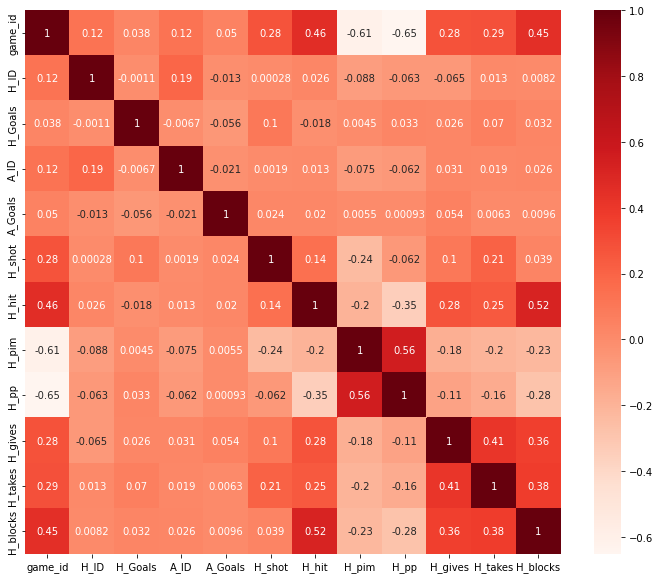

In [252]:
plt.figure(figsize=(12,10))
cor = temp.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [234]:
X= temp[['H_win_percent','H_shot','H_hit','H_pim','H_pp','H_gives','H_takes','H_blocks','A_win_percent','A_shot','A_hit','A_pim','A_pp','A_gives','A_takes','A_blocks']]
y= temp['Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 ,random_state=0)

In [235]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuaracy is",score)

Accuaracy is 0.5623125624791736


In [236]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuaracy is",score)

Accuaracy is 0.5436521159613462


In [237]:
clf = GradientBoostingClassifier()
clf.fit(X, y)
score = clf.score(X_test, y_test)
print("Accuaracy is",score)

Accuaracy is 0.5836387870709764


### Adding Rolling Average

In [238]:
def find_rolling(team):
  rolling= team[['shots','hits','pim','powerPlayOpportunities','giveaways','takeaways','blocked']].rolling(10).mean()
  rolling[['game_id','team_id']] =team[['game_id','team_id']]
  return rolling
#roll = team_stats_data.groupby(['team_id', 'season'], group_keys =False).apply(find_rolling)
roll = team_stats_data.groupby(['team_id'], group_keys =False).apply(find_rolling)

In [239]:
roll= roll.dropna()

In [240]:
roll

,shots,hits,pim,powerPlayOpportunities,giveaways,takeaways,blocked,game_id,team_id
129,30.1,24.5,7.6,2.3,9.9,5.5,15.8,2015020227,2
145,29.6,22.7,10.9,3.3,9.6,9.3,15.9,2016020435,10
147,33.3,23.5,7.0,3.5,16.7,9.8,15.3,2015021111,28
158,33.8,22.0,7.4,3.9,16.5,9.2,14.3,2017021194,28
173,28.0,22.4,8.1,3.4,8.3,6.9,14.5,2015020061,52
...,...,...,...,...,...,...,...,...,...
52605,30.8,38.4,11.2,3.2,10.4,10.6,10.2,2018030416,19
52606,29.1,37.0,10.4,2.9,9.4,10.6,11.0,2018030417,19
52607,29.2,33.9,7.8,3.2,5.8,9.5,15.6,2018030417,6
52608,27.4,35.6,9.6,2.6,8.4,10.6,11.8,2018030417,19


In [241]:
games

,game_id,season,Date,H,team_id,H_Goals,A,A_ID,A_Goals,Win
0,2000020001,2000,2000-10-04,Stars,25,2,Avalanche,21,2,NaN
1,2000021024,2000,2001-03-10,Stars,25,3,Avalanche,21,2,H
2,2001020550,2001,2001-12-27,Stars,25,0,Avalanche,21,2,A
3,2001021160,2001,2002-04-06,Stars,25,3,Avalanche,21,1,H
4,2002020249,2002,2002-11-16,Stars,25,4,Avalanche,21,2,H
...,...,...,...,...,...,...,...,...,...,...
26290,2019030321,2019,2020-09-07,Golden Knights,54,0,Stars,25,1,A
26291,2019030322,2019,2020-09-09,Golden Knights,54,3,Stars,25,0,H
26292,2019030322,2019,2020-09-09,Golden Knights,54,3,Stars,25,0,H
26293,2019030325,2019,2020-09-15,Golden Knights,54,2,Stars,25,3,A


In [242]:
temp=pd.merge(games,roll, on=['game_id','team_id'])
temp.rename(columns={'team_id':'H_ID', 'A_ID':'team_id','shots':'H_shot','hits':'H_hit','pim':'H_pim','powerPlayOpportunities':'H_pp','giveaways':'H_gives','takeaways':'H_takes','blocked':'H_blocks'}, inplace= True)
games.rename(columns={'team_id':'H_ID', 'A_ID':'team_id'}, inplace= True)
temp2=pd.merge(games,roll, on=['game_id','team_id'])
temp2.rename(columns={'team_id':'A_ID','shots':'A_shot','hits':'A_hit','pim':'A_pim','powerPlayOpportunities':'A_pp','giveaways':'A_gives','takeaways':'A_takes','blocked':'A_blocks'}, inplace= True)
temp.rename(columns={'team_id':'A_ID'}, inplace= True)

In [243]:
temp=temp.drop(['season','Date'], axis=1)

In [244]:
temp2=temp2.drop(['season','Date'], axis=1)

In [ ]:
temp3=temp3.drop(['season','Date'], axis=1)

In [247]:
temp3=pd.merge(temp,temp2, on=['game_id','H', 'H_ID', 'H_Goals', 'A', 'A_ID', 'A_Goals', 'Win'])

temp3=temp3.replace(to_replace="H",value=0)
temp3=temp3.replace(to_replace="A",value=1)
temp3=temp3.dropna()
temp3

,game_id,H,H_ID,H_Goals,A,A_ID,A_Goals,Win,H_shot,H_hit,...,H_gives,H_takes,H_blocks,A_shot,A_hit,A_pim,A_pp,A_gives,A_takes,A_blocks
0,2002020249,Stars,25,4,Avalanche,21,2,0.0,25.0,17.4,...,8.6,8.9,11.0,27.6,9.1,9.8,5.1,3.1,4.6,8.4
1,2002020634,Stars,25,6,Avalanche,21,3,0.0,28.4,5.6,...,9.6,4.4,4.5,30.1,9.7,12.4,3.6,4.4,3.5,3.8
2,2003020628,Stars,25,2,Avalanche,21,4,1.0,25.5,21.8,...,26.3,11.8,11.7,29.2,21.6,14.9,4.7,12.8,12.3,11.7
3,2003020903,Stars,25,5,Avalanche,21,1,0.0,28.0,19.6,...,22.8,9.3,8.9,26.5,15.7,25.7,4.4,12.7,7.6,14.6
4,2005020035,Stars,25,2,Avalanche,21,3,1.0,26.2,22.5,...,12.7,6.6,14.5,30.4,12.4,13.3,6.5,6.2,9.8,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59547,2019030325,Golden Knights,54,2,Stars,25,3,1.0,33.2,44.2,...,16.0,7.2,15.5,23.6,45.6,10.0,2.6,16.6,11.8,17.0
59548,2019030325,Golden Knights,54,2,Stars,25,3,1.0,33.2,44.4,...,16.6,7.0,16.2,24.5,46.0,9.8,2.4,16.6,11.9,17.3
59549,2019030325,Golden Knights,54,2,Stars,25,3,1.0,33.2,44.4,...,16.6,7.0,16.2,23.6,45.6,10.0,2.6,16.6,11.8,17.0
59550,2019030325,Golden Knights,54,2,Stars,25,3,1.0,33.2,44.4,...,16.6,7.0,16.2,24.5,46.0,9.8,2.4,16.6,11.9,17.3


In [248]:
X= temp3[['H_shot','H_hit','H_pim','H_pp','H_gives','H_takes','H_blocks','A_shot','A_hit','A_pim','A_pp','A_gives','A_takes','A_blocks']]
y= temp3['Win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 ,random_state=0)

In [249]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Accuaracy is",score)

Accuaracy is 0.5663334233990813


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [267]:
clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuaracy is",score)


Accuaracy is 0.8514590651175358


In [269]:
metrics.f1_score(y_test , y_pred)


0.8336988580503667

In [251]:
clf = GradientBoostingClassifier()
clf.fit(X, y)
score = clf.score(X_test, y_test)
print("Accuaracy is",score)

Accuaracy is 0.6448257227776276
